## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
def build_mlp(input_shape,output_unit=10,num_neunorons=[512,256,128]):
    input_layer=keras.layers.Input(input_shape)
    
    for i, n in enumerate(num_neunorons):
        if i==0:
            x=keras.layers.Dense(units=n,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(units=n,activation='relu',name='hidden_layer'+str(i+1))(x)
        
    out=keras.layers.Dense(units=output_unit, activation='softmax', name='output_layer')(x)
    model=keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [36]:
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
momentum=[0.0,0.5,0.95]
nesteror=[True,False]

In [39]:
results = {}
for i in momentum:
    for j in nesteror:
        keras.backend.clear_session() #把舊的graph洗掉
        print("Experiment with momentum={}, nesteror={}".format(i,j))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=j, momentum=i)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag='EXP_momentum={}_nesteror={}'.format(i,j)
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with momentum=0.0, nesteror=True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/5000

50000/50000 [==============================] - 8s 165us/step - loss: 1.2411 - accuracy: 0.5658 - val_loss: 1.4240 - val_accuracy: 0.4887
Epoch 49/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.2383 - accuracy: 0.5646 - val_loss: 1.4737 - val_accuracy: 0.4754
Epoch 50/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.2303 - accuracy: 0.5672 - val_loss: 1.3660 - val_accuracy: 0.5148
Experiment with momentum=0.0, nesteror=False
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________

50000/50000 [==============================] - 7s 149us/step - loss: 1.2673 - accuracy: 0.5568 - val_loss: 1.4660 - val_accuracy: 0.4780
Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.2668 - accuracy: 0.5556 - val_loss: 1.3791 - val_accuracy: 0.5121
Epoch 47/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.2487 - accuracy: 0.5613 - val_loss: 1.4734 - val_accuracy: 0.4791
Epoch 48/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.2404 - accuracy: 0.5656 - val_loss: 1.4692 - val_accuracy: 0.4768
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.2360 - accuracy: 0.5669 - val_loss: 1.3808 - val_accuracy: 0.5076
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.2309 - accuracy: 0.5680 - val_loss: 1.4848 - val_accuracy: 0.4759
Experiment with momentum=0.5, nesteror=True
Model: "model_1"
_________________________________________________________

50000/50000 [==============================] - 8s 161us/step - loss: 1.1163 - accuracy: 0.6083 - val_loss: 1.3976 - val_accuracy: 0.5070
Epoch 43/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.1038 - accuracy: 0.6158 - val_loss: 1.5016 - val_accuracy: 0.4877
Epoch 44/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.0913 - accuracy: 0.6183 - val_loss: 1.3736 - val_accuracy: 0.5162
Epoch 45/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.0867 - accuracy: 0.6201 - val_loss: 1.3859 - val_accuracy: 0.5132
Epoch 46/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.0776 - accuracy: 0.6250 - val_loss: 1.3753 - val_accuracy: 0.5137
Epoch 47/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.0655 - accuracy: 0.6274 - val_loss: 1.7101 - val_accuracy: 0.4314
Epoch 48/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.0592 - accuracy: 0.6316 - val_loss:

50000/50000 [==============================] - 7s 132us/step - loss: 1.1001 - accuracy: 0.6133 - val_loss: 1.3649 - val_accuracy: 0.5237
Epoch 40/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.0989 - accuracy: 0.6131 - val_loss: 1.4552 - val_accuracy: 0.4928
Epoch 41/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.0872 - accuracy: 0.6193 - val_loss: 1.4208 - val_accuracy: 0.5091
Epoch 42/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.0832 - accuracy: 0.6205 - val_loss: 1.5137 - val_accuracy: 0.4779
Epoch 43/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.0669 - accuracy: 0.6263 - val_loss: 1.3661 - val_accuracy: 0.5201
Epoch 44/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.0570 - accuracy: 0.6298 - val_loss: 1.3412 - val_accuracy: 0.5256
Epoch 45/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.0475 - accuracy: 0.6335 - val_loss:

50000/50000 [==============================] - 9s 175us/step - loss: 0.5999 - accuracy: 0.7844 - val_loss: 1.7651 - val_accuracy: 0.5229
Epoch 37/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.5907 - accuracy: 0.7869 - val_loss: 1.7573 - val_accuracy: 0.5258
Epoch 38/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.5550 - accuracy: 0.8016 - val_loss: 1.7943 - val_accuracy: 0.5147
Epoch 39/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.5535 - accuracy: 0.8008 - val_loss: 1.7913 - val_accuracy: 0.5275
Epoch 40/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.5327 - accuracy: 0.8077 - val_loss: 1.8768 - val_accuracy: 0.5238
Epoch 41/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.5177 - accuracy: 0.8125 - val_loss: 1.8706 - val_accuracy: 0.5314
Epoch 42/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.5000 - accuracy: 0.8205 - val_loss:

50000/50000 [==============================] - 9s 171us/step - loss: 0.8890 - accuracy: 0.6789 - val_loss: 1.5081 - val_accuracy: 0.5137
Epoch 34/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.9020 - accuracy: 0.6752 - val_loss: 1.4762 - val_accuracy: 0.5267
Epoch 35/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.8614 - accuracy: 0.6919 - val_loss: 1.4646 - val_accuracy: 0.5281
Epoch 36/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.8519 - accuracy: 0.6952 - val_loss: 1.5022 - val_accuracy: 0.5183
Epoch 37/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.8174 - accuracy: 0.7072 - val_loss: 1.4900 - val_accuracy: 0.5258
Epoch 38/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.7943 - accuracy: 0.7152 - val_loss: 1.4742 - val_accuracy: 0.5307
Epoch 39/50
50000/50000 [==============================] - 9s 176us/step - loss: 0.7813 - accuracy: 0.7203 - val_loss:

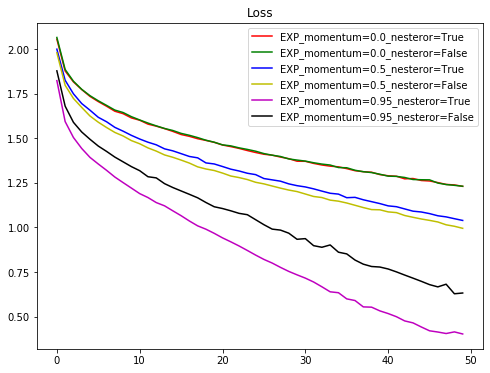

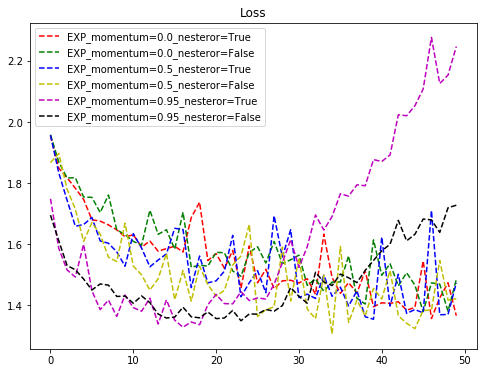

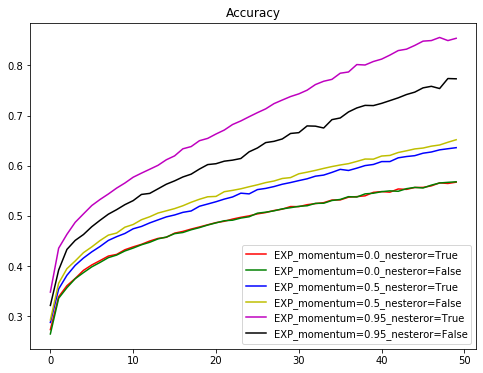

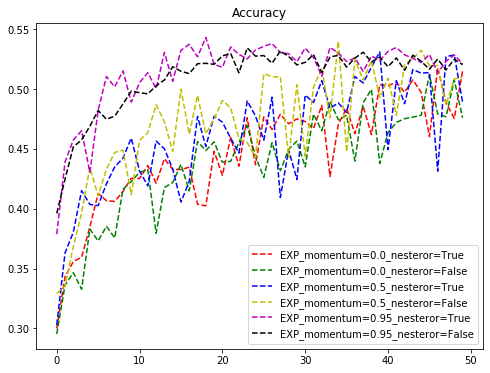

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()